# Individual Segmentation 

In [2]:
# K-Means Clustering 

# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#reading data into a dataframe 

df = pd.read_csv(r'C:\Users\HP\Downloads\archive (13)\segmentation data.csv',index_col = 0 ,header = 0)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
print(df.shape)

(2000, 7)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB
None


In [6]:
print(df.isnull().sum())

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


In [7]:
#descriptive statistics of the dataset
df.describe(include='all')

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [8]:
df.dtypes

Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

In [9]:
df.shape

(2000, 7)

In [12]:
#Creating X
X = df.values[:, [2,3,4,5,6]]

In [13]:
#Scaling data into uniform range
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [14]:
X

array([[ 2.65361447,  1.60432297,  0.09752361,  0.29682303,  1.552326  ],
       [-1.18713209, -0.06337243,  0.78265438,  0.29682303,  1.552326  ],
       [ 1.11731585, -0.06337243, -0.83320224, -1.26952539, -0.90972951],
       ...,
       [-0.41898277, -1.73106782, -0.90695688, -1.26952539, -0.90972951],
       [-1.01643224, -0.06337243, -0.60332923, -1.26952539, -0.90972951],
       [-0.93108232, -1.73106782, -1.3789866 , -1.26952539, -0.90972951]])

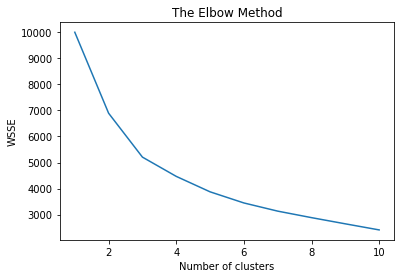

In [14]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wsse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1, 11), wsse)
#plt.scatter(range(1, 11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [15]:
print(wsse)

[10000.0, 6892.470598343651, 5207.765382122496, 4468.827558848493, 3876.22183338638, 3449.136151250428, 3135.325446782865, 2885.514769458443, 2647.9175699758443, 2414.4927378614448]


In [16]:
#Fitting K-means to the dataset
kmeans = KMeans(n_clusters = 3, random_state = 10)
Y_pred = kmeans.fit_predict(X)

#kmeans.fit(X)-->training 
#Y_pred=Lkmeans.predict(X)-->predicting

In [17]:
#predicted cluster centers
Y_pred

array([1, 2, 0, ..., 0, 0, 0])

In [18]:
# Error at the 3rd cluster
kmeans.inertia_

5207.765382122496

In [19]:
#Number of iterations took by the model to reach the 
#zero convergence error
kmeans.n_iter_

10

In [20]:
#Creating different column name Clusters  
df['Clusters']=Y_pred
df.head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,1
100000002,1,1,22,1,150773,1,2,2
100000003,0,0,49,1,89210,0,0,0
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,1
100000006,0,0,35,1,144848,0,0,0
100000007,0,0,53,1,156495,1,1,1
100000008,0,0,35,1,193621,2,1,2
100000009,0,1,61,2,151591,0,0,1


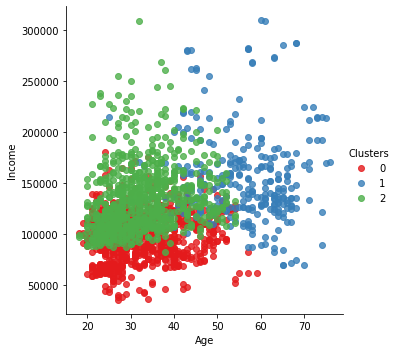

In [21]:
sns.lmplot( data=df, x='Age', y='Income',
           fit_reg=False, # No regression line
           hue='Clusters',palette="Set1")  
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
#       s = 300, c = 'black')
plt.show()

In [22]:
kmeans.cluster_centers_

array([[-0.29822568, -0.20902268, -0.59711065, -0.67273981, -0.88553901],
       [ 1.6798234 ,  1.6602859 ,  0.94745634,  0.4387405 ,  0.41631045],
       [-0.28932907, -0.3858784 ,  0.33665568,  0.61766539,  0.8741644 ]])

In [23]:
df['Clusters']=df.Clusters.map({0:'Low Income Group',1:'High Income Group(Aged)',2:'High Income Group(Low Age)'})
#2-1 Target Individuals
#1-2 Target Individuals
#0-3 Target Individuals

In [24]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,High Income Group(Aged)
100000002,1,1,22,1,150773,1,2,High Income Group(Low Age)
100000003,0,0,49,1,89210,0,0,Low Income Group
100000004,0,0,45,1,171565,1,1,High Income Group(Low Age)
100000005,0,0,53,1,149031,1,1,High Income Group(Aged)
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,Low Income Group
100001997,1,1,27,1,117744,1,0,Low Income Group
100001998,0,0,31,0,86400,0,0,Low Income Group


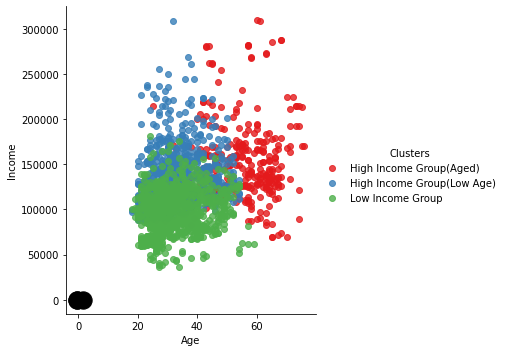

In [25]:
sns.lmplot( data=df, x='Age', y='Income',
           fit_reg=False, # No regression line
           hue='Clusters',palette="Set1")  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black')
plt.show()
#cluster centres are not in centre because it is not fit on this data  

In [26]:
#segregating obs into High Income Group which is our target customer
new_df=df[df['Clusters']=='High Income Group(Low Age)']

In [27]:
new_df.shape

(786, 8)

In [28]:
new_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters
ID,,,,,,,,
100000002,1,1,22,1,150773,1,2,High Income Group(Low Age)
100000004,0,0,45,1,171565,1,1,High Income Group(Low Age)
100000008,0,0,35,1,193621,2,1,High Income Group(Low Age)
100000010,0,1,28,1,174646,2,0,High Income Group(Low Age)
100000013,1,1,22,1,108687,1,2,High Income Group(Low Age)
...,...,...,...,...,...,...,...,...
100001584,1,1,31,1,138307,1,1,High Income Group(Low Age)
100001594,1,1,31,1,104074,1,1,High Income Group(Low Age)
100001595,1,0,33,1,138525,1,1,High Income Group(Low Age)


In [29]:
#Saving it into Excel file
new_df.to_excel(r'TargetIndividuals.xlsx',index=True)

In [30]:
new_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters
ID,,,,,,,,
100000002,1,1,22,1,150773,1,2,High Income Group(Low Age)
100000004,0,0,45,1,171565,1,1,High Income Group(Low Age)
100000008,0,0,35,1,193621,2,1,High Income Group(Low Age)
100000010,0,1,28,1,174646,2,0,High Income Group(Low Age)
100000013,1,1,22,1,108687,1,2,High Income Group(Low Age)
...,...,...,...,...,...,...,...,...
100001584,1,1,31,1,138307,1,1,High Income Group(Low Age)
100001594,1,1,31,1,104074,1,1,High Income Group(Low Age)
100001595,1,0,33,1,138525,1,1,High Income Group(Low Age)


# WITHOUT OUTLIERS 

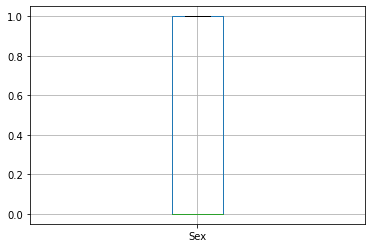

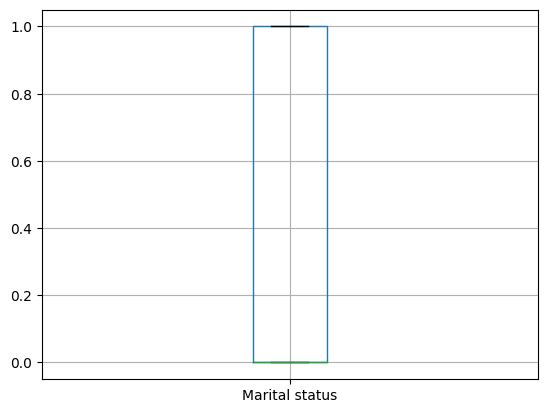

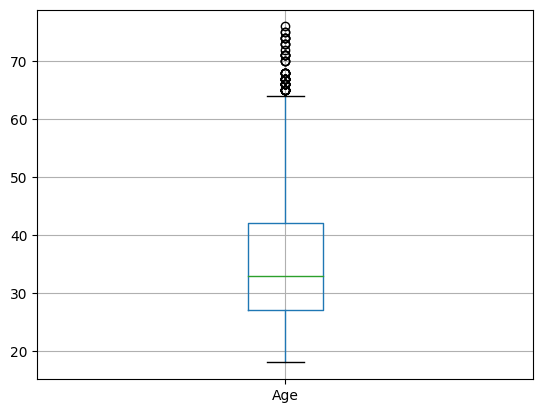

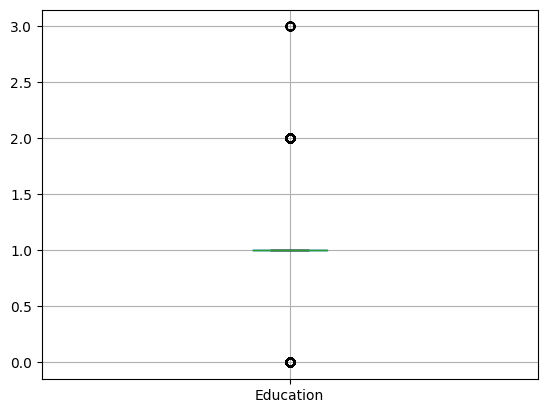

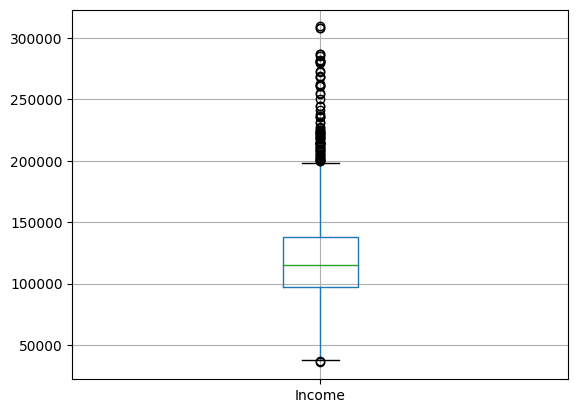

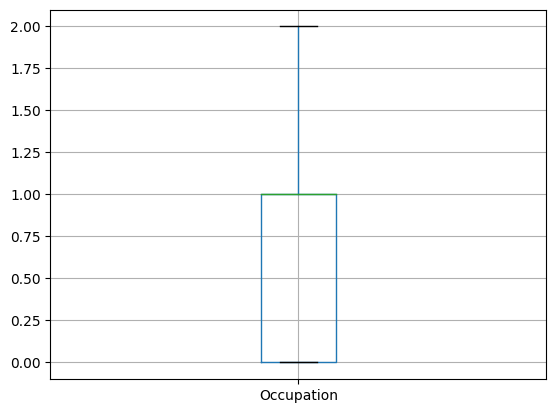

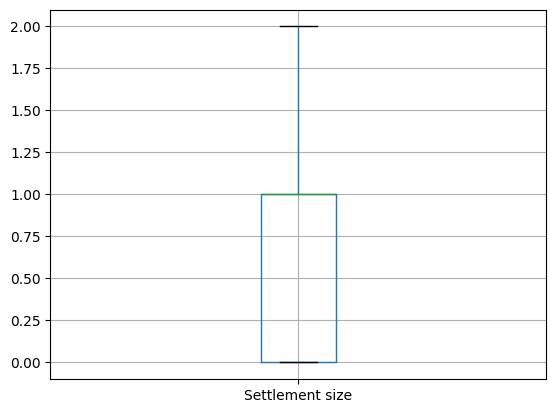

In [15]:
#checking out outliers in data using boxplot
for i in df.columns:
    df.boxplot(column=i)
    plt.show()

In [17]:
#checking out outliers using IQR 
for x in ['Age']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [19]:
for x in ['Income']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [20]:
df.isnull().sum()

Sex                 0
Marital status      0
Age                57
Education           0
Income             83
Occupation          0
Settlement size     0
dtype: int64

In [21]:
#droping the null values
df = df.dropna(axis = 0)


In [22]:
#Checking missing value 
df.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [23]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000002,1,1,22.0,1,150773.0,1,2
100000003,0,0,49.0,1,89210.0,0,0
100000004,0,0,45.0,1,171565.0,1,1
100000005,0,0,53.0,1,149031.0,1,1
100000006,0,0,35.0,1,144848.0,0,0
...,...,...,...,...,...,...,...
100001996,1,0,47.0,1,123525.0,0,0
100001997,1,1,27.0,1,117744.0,1,0
100001998,0,0,31.0,0,86400.0,0,0


In [24]:
X = df.values[:, [2,3,4,5,6]]

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [26]:
X

array([[-1.23057569,  0.01469907,  1.17946976,  0.38391262,  1.61713076],
       [ 1.37638803,  0.01469907, -0.89138076, -1.25891714, -0.87383672],
       [ 0.99017119,  0.01469907,  1.87886914,  0.38391262,  0.37164702],
       ...,
       [-0.36158778, -1.81778462, -0.98590328, -1.25891714, -0.87383672],
       [-1.03746726,  0.01469907, -0.59677996, -1.25891714, -0.87383672],
       [-0.94091305, -1.81778462, -1.59084742, -1.25891714, -0.87383672]])

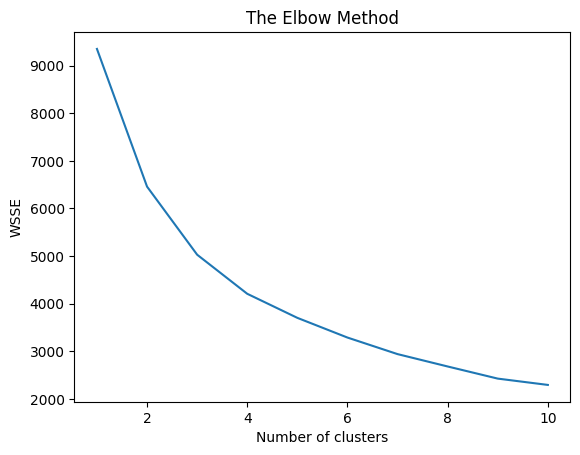

In [27]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wsse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1, 11), wsse)
#plt.scatter(range(1, 11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [28]:
print(wsse)

[9350.0, 6458.18350774572, 5028.521180515049, 4207.41463819928, 3702.102245903331, 3288.5175876430103, 2940.749778609814, 2681.005895995616, 2426.2620602717916, 2293.7108159507143]


In [29]:
#Fitting K-means to the dataset
kmeans = KMeans(n_clusters = 3, random_state = 10)
Y_pred = kmeans.fit_predict(X)

#kmeans.fit(X)-->training 
#Y_pred=Lkmeans.predict(X)-->predicting

In [30]:
Y_pred

array([2, 0, 2, ..., 0, 0, 0])

In [31]:
kmeans.inertia_

5028.521180515049

In [32]:
kmeans.n_iter_

13

In [33]:
df['Clusters']=Y_pred
df.head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters
ID,,,,,,,,
100000002,1,1,22.0,1,150773.0,1,2,2
100000003,0,0,49.0,1,89210.0,0,0,0
100000004,0,0,45.0,1,171565.0,1,1,2
100000005,0,0,53.0,1,149031.0,1,1,1
100000006,0,0,35.0,1,144848.0,0,0,0
100000007,0,0,53.0,1,156495.0,1,1,1
100000008,0,0,35.0,1,193621.0,2,1,2
100000009,0,1,61.0,2,151591.0,0,0,1
100000010,0,1,28.0,1,174646.0,2,0,2


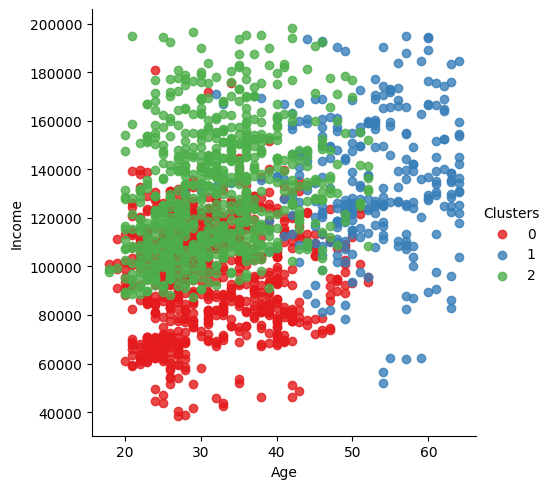

In [34]:
sns.lmplot( data=df, x='Age', y='Income',
           fit_reg=False, # No regression line
           hue='Clusters',palette="Set1")  
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
#       s = 300, c = 'black')
plt.show()

In [35]:
kmeans.cluster_centers_

array([[-0.33984863, -0.25523566, -0.64795249, -0.62932968, -0.85146276],
       [ 1.64397172,  1.56574328,  0.64320298,  0.07553161,  0.14635474],
       [-0.26672522, -0.33105257,  0.4751777 ,  0.67838211,  0.90039012]])

In [36]:
df['Clusters']=df.Clusters.map({0:'Low Income Group',1:'High Income Group(Aged)',2:'High Income Group(Low Age)'})
#2-1 Target Individuals
#1-2 Target Individuals
#0-3 Target Individuals

In [37]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters
ID,,,,,,,,
100000002,1,1,22.0,1,150773.0,1,2,High Income Group(Low Age)
100000003,0,0,49.0,1,89210.0,0,0,Low Income Group
100000004,0,0,45.0,1,171565.0,1,1,High Income Group(Low Age)
100000005,0,0,53.0,1,149031.0,1,1,High Income Group(Aged)
100000006,0,0,35.0,1,144848.0,0,0,Low Income Group
...,...,...,...,...,...,...,...,...
100001996,1,0,47.0,1,123525.0,0,0,Low Income Group
100001997,1,1,27.0,1,117744.0,1,0,Low Income Group
100001998,0,0,31.0,0,86400.0,0,0,Low Income Group


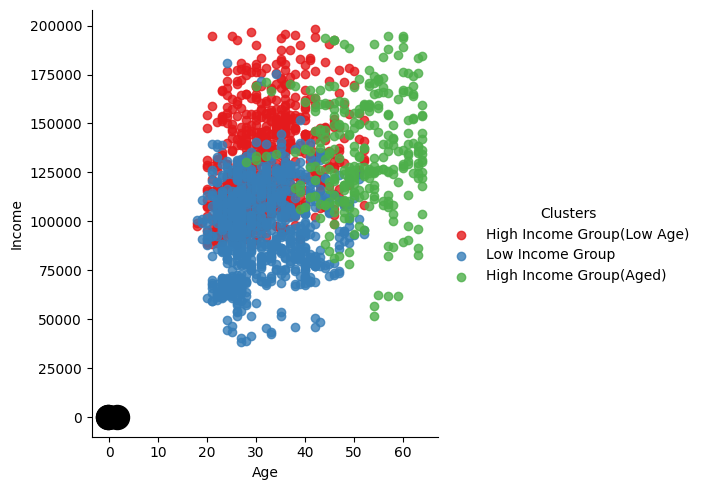

In [38]:
sns.lmplot( data=df, x='Age', y='Income',
           fit_reg=False, # No regression line
           hue='Clusters',palette="Set1")  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black')
plt.show()

In [39]:
new_df=df[df['Clusters']=='High Income Group(Low Age)']

In [40]:
new_df.shape

(742, 8)

In [41]:
new_df.to_excel(r'TargetIndividuals1.xlsx',index=True)

In [42]:
new_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters
ID,,,,,,,,
100000002,1,1,22.0,1,150773.0,1,2,High Income Group(Low Age)
100000004,0,0,45.0,1,171565.0,1,1,High Income Group(Low Age)
100000008,0,0,35.0,1,193621.0,2,1,High Income Group(Low Age)
100000010,0,1,28.0,1,174646.0,2,0,High Income Group(Low Age)
100000013,1,1,22.0,1,108687.0,1,2,High Income Group(Low Age)
...,...,...,...,...,...,...,...,...
100001584,1,1,31.0,1,138307.0,1,1,High Income Group(Low Age)
100001594,1,1,31.0,1,104074.0,1,1,High Income Group(Low Age)
100001595,1,0,33.0,1,138525.0,1,1,High Income Group(Low Age)
